In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [2]:
df = pd.read_csv('../../data/ETH-USD.csv')
df1=df.reset_index()['Close']

In [3]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

## 7-2-1

In [4]:
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size + test_size]
val_data = df1[train_size + test_size:]

In [5]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [6]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

In [8]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", ytest.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", yval.shape)

X_train shape: (1390, 100, 1)
y_train shape: (1390,)
X_test shape: (325, 100, 1)
y_test shape: (325,)
X_val shape: (113, 100, 1)
y_val shape: (113,)


In [9]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [10]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 [==============================] - 1s 13ms/step - loss: 0.0149 - val_loss: 0.0046
Epoch 2/100
22/22 [==============================] - 0s 7ms/step - loss: 0.0013 - val_loss: 9.5894e-04
Epoch 3/100
22/22 [==============================] - 0s 7ms/step - loss: 9.0297e-04 - val_loss: 9.2545e-04
Epoch 4/100
22/22 [==============================] - 0s 7ms/step - loss: 7.9779e-04 - val_loss: 7.3027e-04
Epoch 5/100
22/22 [==============================] - 0s 7ms/step - loss: 7.4644e-04 - val_loss: 7.5776e-04
Epoch 6/100
22/22 [==============================] - 0s 7ms/step - loss: 6.5948e-04 - val_loss: 5.4978e-04
Epoch 7/100
22/22 [==============================] - 0s 7ms/step - loss: 6.2726e-04 - val_loss: 4.8160e-04
Epoch 8/100
22/22 [==============================] - 0s 7ms/step - loss: 6.8200e-04 - val_loss: 4.7302e-04
Epoch 9/100
22/22 [==============================] - 0s 7ms/step - loss: 6.2134e-04 - val_loss: 6.9860e-04
Epoch 10/100
22/22 [============================

22/22 [==============================] - 0s 7ms/step - loss: 2.8813e-04 - val_loss: 2.3521e-04
Epoch 78/100
22/22 [==============================] - 0s 7ms/step - loss: 2.8859e-04 - val_loss: 2.3014e-04
Epoch 79/100
22/22 [==============================] - 0s 7ms/step - loss: 2.8354e-04 - val_loss: 2.5041e-04
Epoch 80/100
22/22 [==============================] - 0s 7ms/step - loss: 2.7826e-04 - val_loss: 2.9525e-04
Epoch 81/100
22/22 [==============================] - 0s 7ms/step - loss: 3.0207e-04 - val_loss: 3.3312e-04
Epoch 82/100
22/22 [==============================] - 0s 7ms/step - loss: 3.5398e-04 - val_loss: 2.1825e-04
Epoch 83/100
22/22 [==============================] - 0s 7ms/step - loss: 2.8523e-04 - val_loss: 2.7647e-04
Epoch 84/100
22/22 [==============================] - 0s 7ms/step - loss: 2.9089e-04 - val_loss: 2.1549e-04
Epoch 85/100
22/22 [==============================] - 0s 7ms/step - loss: 3.0666e-04 - val_loss: 2.2685e-04
Epoch 86/100
22/22 [=====================

In [11]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

4/4 [==============================] - 0s 3ms/step


In [12]:
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)

In [13]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
yval = scaler.inverse_transform(yval.reshape(-1,1))

In [14]:
print('---------VALIDATE----------')
valid_mape = np.mean(np.abs( (yval - y_pred_val) / yval )) * 100
print('MAPE:', valid_mape)
valid_mae = np.mean(np.abs(y_pred_val - yval))
print('MAE:', valid_mae)
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('RMSE:', valid_rmse)
print('---------TEST-------------')
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
print('MAPE:', test_mape)
test_mae = np.mean(np.abs(y_pred - ytest))
print('MAE:', test_mae)
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('RMSE:', test_rmse)

---------VALIDATE----------
MAPE: 2.661514138159064
MAE: 45.67342837188881
RMSE: 52.772446086834144
---------TEST-------------
MAPE: 4.162057946564778
MAE: 61.08314733617788
RMSE: 79.85777796021848


In [15]:
val_data.shape

(214, 1)

In [17]:
x_input=val_data[113:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.37510924 0.37815887 0.37566241 0.37870563 0.38004325 0.37593455
 0.37477514 0.37808108 0.371164   0.37032783 0.36875763 0.37029641
 0.36870457 0.3685939  0.37470005 0.37438071 0.37363106 0.37286346
 0.3732369  0.37120428 0.3722419  0.36859261 0.36409289 0.33855752
 0.33348359 0.33528716 0.3385403  0.33482122 0.32776157 0.33736054
 0.33327198 0.33178935 0.33038736 0.33275767 0.33168832 0.34803179
 0.34282564 0.33024615 0.32661909 0.32842421 0.32823221 0.32686531
 0.3277059  0.32741462 0.33066054 0.32823647 0.32803014 0.32415232
 0.31036336 0.31899146 0.32228245 0.32629825 0.32940035 0.32804269
 0.32543577 0.32849224 0.32980314 0.32543448 0.31727343 0.31916889
 0.31929357 0.31654294 0.31812285 0.31920039 0.3200621  0.33177827
 0.33496395 0.33564461 0.34889577 0.33405098 0.33258266 0.33071127
 0.3230202  0.33028685 0.32789242 0.32768881 0.31632154 0.31376354
 0.3134551  0.30781982 0.31045892 0.31112886 0.31172385 0.32070576
 0.31328267 0.31292528 0.3137094  0.32157987 0.326

13 day output [[0.50240946]]
14 day input [0.37470005 0.37438071 0.37363106 0.37286346 0.3732369  0.37120428
 0.3722419  0.36859261 0.36409289 0.33855752 0.33348359 0.33528716
 0.3385403  0.33482122 0.32776157 0.33736054 0.33327198 0.33178935
 0.33038736 0.33275767 0.33168832 0.34803179 0.34282564 0.33024615
 0.32661909 0.32842421 0.32823221 0.32686531 0.3277059  0.32741462
 0.33066054 0.32823647 0.32803014 0.32415232 0.31036336 0.31899146
 0.32228245 0.32629825 0.32940035 0.32804269 0.32543577 0.32849224
 0.32980314 0.32543448 0.31727343 0.31916889 0.31929357 0.31654294
 0.31812285 0.31920039 0.3200621  0.33177827 0.33496395 0.33564461
 0.34889577 0.33405098 0.33258266 0.33071127 0.3230202  0.33028685
 0.32789242 0.32768881 0.31632154 0.31376354 0.3134551  0.30781982
 0.31045892 0.31112886 0.31172385 0.32070576 0.31328267 0.31292528
 0.3137094  0.32157987 0.3267911  0.33400918 0.3555738  0.3596042
 0.3602303  0.36375029 0.35867517 0.35795028 0.36195382 0.36502981
 0.36637725 0.3728561

27 day output [[0.6549872]]
28 day input [0.32776157 0.33736054 0.33327198 0.33178935 0.33038736 0.33275767
 0.33168832 0.34803179 0.34282564 0.33024615 0.32661909 0.32842421
 0.32823221 0.32686531 0.3277059  0.32741462 0.33066054 0.32823647
 0.32803014 0.32415232 0.31036336 0.31899146 0.32228245 0.32629825
 0.32940035 0.32804269 0.32543577 0.32849224 0.32980314 0.32543448
 0.31727343 0.31916889 0.31929357 0.31654294 0.31812285 0.31920039
 0.3200621  0.33177827 0.33496395 0.33564461 0.34889577 0.33405098
 0.33258266 0.33071127 0.3230202  0.33028685 0.32789242 0.32768881
 0.31632154 0.31376354 0.3134551  0.30781982 0.31045892 0.31112886
 0.31172385 0.32070576 0.31328267 0.31292528 0.3137094  0.32157987
 0.3267911  0.33400918 0.3555738  0.3596042  0.3602303  0.36375029
 0.35867517 0.35795028 0.36195382 0.36502981 0.36637725 0.37285613
 0.38129127 0.38973513 0.39685702 0.40519065 0.41153398 0.41877165
 0.42726761 0.43662885 0.44734144 0.4598861  0.47088423 0.48402727
 0.49148893 0.5024094

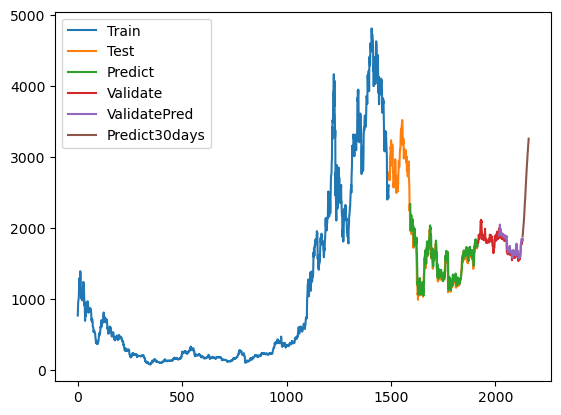

In [18]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()